In [1]:
%load_ext autoreload
%autoreload 2

import os
import cv2
import matplotlib.pyplot as plt
from attention.img_proc.img_process import *
from attention.img_proc.img_split import *
from attention.models.face_models import *
from attention.utils.img_plot import *
import copy

In [88]:
image_name = "rl-darkfront-left.jpg"
image_path = "/Users/lancelotbosseler/code/labosseler/final-project/final-attention/notebooks/trial-images/real-life-test/rl-darkfront-left.jpg"

In [89]:
image = cv2_process(image_path)
# plt.imshow(image)

In [90]:
n_split_w = 12
n_split_h = 12
crops = split_image(image, n_split_w, n_split_h, 0.02, 0.02)
# show_crops(crops)

In [91]:
bbox_crop_list = []
bbox_crop_list_origin = []
for crop in crops:
    coord_set = detect_face(crop.image)
    bbox_crop_list.append(coord_set)
    coord_set_origin = reconstruct_coord(crop, coord_set)
    bbox_crop_list_origin.append(coord_set_origin)
bbox_crop_list_origin

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [{'x1': 1255, 'x2': 1360, 'y1': 1542, 'y2': 1624}],
 [{'x1': 1633, 'x2': 1757, 'y1': 1622, 'y2': 1726},
  {'x1': 1271, 'x2': 1346, 'y1': 1541, 'y2': 1626},
  {'x1': 1366, 'x2': 1490, 'y1': 1661, 'y2': 1797}],
 [{'x1': 1650, 'x2': 1745, 'y1': 1620, 'y2': 1727},
  {'x1': 1832, 'x2': 1935, 'y1': 1589, 'y2': 1681}],
 [{'x1': 2219, 'x2': 2329, 'y1': 1577, 'y2': 1669}],
 [{'x1': 2556, 'x2': 2709, 'y1': 1721, 'y2': 1871}],
 [{'x1': 2791, 'x2': 2909, 'y1': 1661, 'y2': 1781}],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [{'x1': 1369, 'x2': 1483, 'y1': 1687, 'y2': 1790}],
 [{'x1': 1741, 'x2': 1943, 'y1': 1923, 'y2': 2133}],
 [],
 [{'x

In [92]:
crops_annotated = []
for i in range(len(crops)):
    crop_annotated = copy.copy(crops[i])
    crop_annotated.image = output_image_bboxes(crop_annotated.image, bbox_crop_list[i])
    crops_annotated.append(crop_annotated)
# show_crops(crops_annotated)

In [93]:
bbox_list = bbox_merge(bbox_crop_list_origin)
bbox_list

[{'x1': 1255, 'x2': 1360, 'y1': 1542, 'y2': 1624},
 {'x1': 1633, 'x2': 1757, 'y1': 1622, 'y2': 1726},
 {'x1': 1366, 'x2': 1490, 'y1': 1661, 'y2': 1797},
 {'x1': 1832, 'x2': 1935, 'y1': 1589, 'y2': 1681},
 {'x1': 2219, 'x2': 2329, 'y1': 1577, 'y2': 1669},
 {'x1': 2556, 'x2': 2709, 'y1': 1721, 'y2': 1871},
 {'x1': 2791, 'x2': 2909, 'y1': 1661, 'y2': 1781},
 {'x1': 1741, 'x2': 1943, 'y1': 1923, 'y2': 2133},
 {'x1': 3396, 'x2': 3553, 'y1': 1835, 'y2': 1993}]

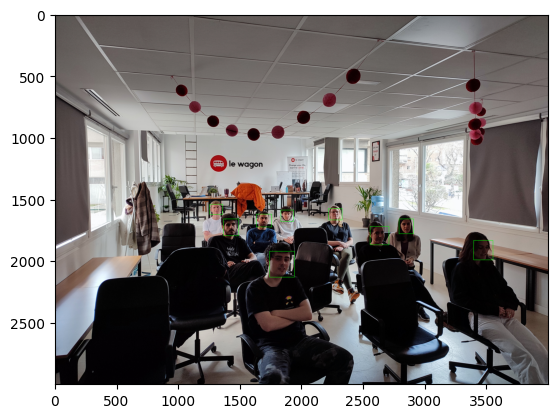

In [94]:
image_output = output_image_bboxes(image, bbox_list)
plt.imshow(image_output)

In [95]:
image_output_rgb = cv2.cvtColor(image_output, cv2.COLOR_RGB2BGR)
output_path = os.path.join(os.path.expanduser('~'), "Desktop", "output")

cv2.imwrite(os.path.join(output_path, image_name), image_output_rgb)

False

In [96]:
crop_faces(image, bbox_list)

[array([[[ 12,   6,   6],
         [ 15,   5,   4],
         [ 32,  18,  15],
         ...,
         [164, 161, 154],
         [165, 162, 155],
         [165, 162, 155]],
 
        [[ 16,   7,   8],
         [ 18,   4,   4],
         [ 34,  19,  16],
         ...,
         [164, 161, 154],
         [164, 161, 154],
         [163, 160, 153]],
 
        [[ 15,   6,   7],
         [ 20,   2,   2],
         [ 55,  36,  32],
         ...,
         [165, 162, 155],
         [166, 163, 154],
         [164, 161, 152]],
 
        ...,
 
        [[ 21,  11,  12],
         [ 18,   6,   6],
         [ 23,   8,   5],
         ...,
         [143, 128, 121],
         [209, 195, 186],
         [214, 202, 190]],
 
        [[ 21,  11,  12],
         [ 17,   5,   5],
         [ 22,   7,   4],
         ...,
         [143, 128, 123],
         [207, 192, 185],
         [216, 203, 194]],
 
        [[ 21,  11,  12],
         [ 16,   4,   4],
         [ 21,   6,   3],
         ...,
         [142, 127, 122],
  

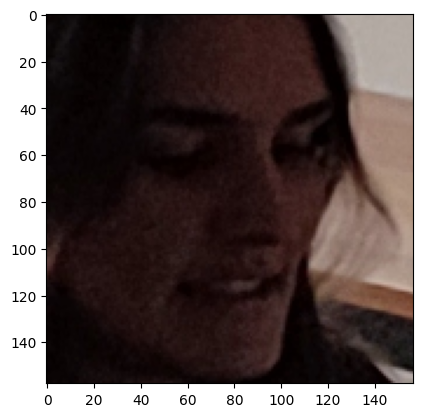

In [104]:
plt.imshow(crop_faces(image, bbox_list)[8])

In [105]:
jebara = crop_faces(image, bbox_list)[1]
noah = crop_faces(image, bbox_list)[2]
julie = crop_faces(image, bbox_list)[3]
juliette = crop_faces(image, bbox_list)[8]
isa = crop_faces(image, bbox_list)[6]
adv = crop_faces(image, bbox_list)[0]
greg = crop_faces(image, bbox_list)[1]
cedric = crop_faces(image, bbox_list)[2]

In [106]:
landmarks_juliette = find_landmarks(juliette)

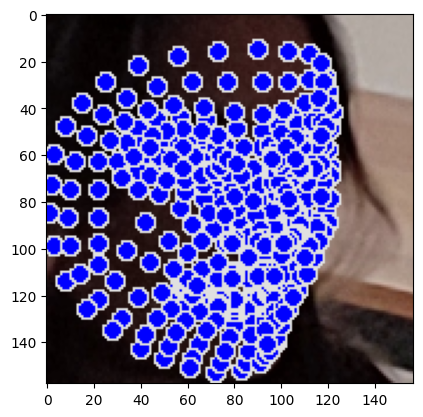

In [107]:
plt.imshow(output_face_landmarks(juliette,landmarks_juliette))